# Analysis of IQ with Gender

# ABSTRACT

The research paper investigated the genetic influences on the size and shape of the human forebrain and its subdivisions in monozygotic (MZ) twins using MRI and quantitative image analysis techniques. The researchers found significant effects of genotype on forebrain volume, cortical surface area, and callosal area, as well as head circumference and full-scale IQ. There were no significant effects of birth order or sex, except for raw head circumference. The results indicate that these brain measures are tightly correlated with each other and with head circumference, but not with IQ in young, healthy adults.

# INTRODUCTION

The dataset contains 9 columns and they are
CCMIDSA: Corpus Collasum Surface Area (cm2)
FIQ: Full-Scale IQ
HC: Head Circumference (cm)
ORDER: Birth Order
PAIR: Pair ID Genotype
SEX: Sex 
TOTSA: Total Surface Area (cm2)
TOTVOL: Total Brain Volume (cm3)
WEIGHT: Body Weight (kg)

The study investigates the genetic influences on brain size, head size, and intelligence quotient (IQ) in monozygotic (MZ) twins. Previous studies have shown evidence of genetic influences on intellectual functions and their derangement in certain neurologic and psychiatric diseases afflicting the forebrain. However, little is known about genetic influences on the size and shape of the human forebrain. The researchers used MRI and quantitative image analysis techniques to examine neuroanatomic similarities in MZ twins and their relationship to head size and IQ. The study aims to shed light on the genetic factors that influence brain and head size, as well as their relationship to IQ, in young, healthy adults.

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sn
#from statsmodels.formula.api import ols
#import statsmodels.graphics.regressionplots as plt
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from scipy.stats import chi2_contingency




In [22]:
df=pd.read_csv('./IQ.csv',index_col=0).reset_index()

In [23]:
df

,CCMIDSA,FIQ,HC,ORDER,PAIR,SEX,TOTSA,TOTVOL,WEIGHT
0,6.08,96,54.7,1,1,F,1913.88,1005,57.607
1,5.73,89,54.2,2,1,F,1684.89,963,58.968
2,6.22,87,53.0,1,2,F,1902.36,1035,64.184
3,5.80,87,52.9,2,2,F,1860.24,1027,58.514
4,7.99,101,57.8,1,3,F,2264.25,1281,63.958
5,8.42,103,56.9,2,3,F,2216.40,1272,61.690
6,7.44,103,56.6,1,4,F,1866.99,1051,133.358
7,6.84,96,55.3,2,4,F,1850.64,1079,107.503
8,6.48,127,53.1,1,5,F,1743.04,1034,62.143
9,6.43,126,54.8,2,5,F,1709.30,1070,83.009


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CCMIDSA  20 non-null     float64
 1   FIQ      20 non-null     int64  
 2   HC       20 non-null     float64
 3   ORDER    20 non-null     int64  
 4   PAIR     20 non-null     int64  
 5   SEX      20 non-null     object 
 6   TOTSA    20 non-null     float64
 7   TOTVOL   20 non-null     int64  
 8   WEIGHT   20 non-null     float64
dtypes: float64(4), int64(4), object(1)
memory usage: 1.5+ KB


# Data Visualization

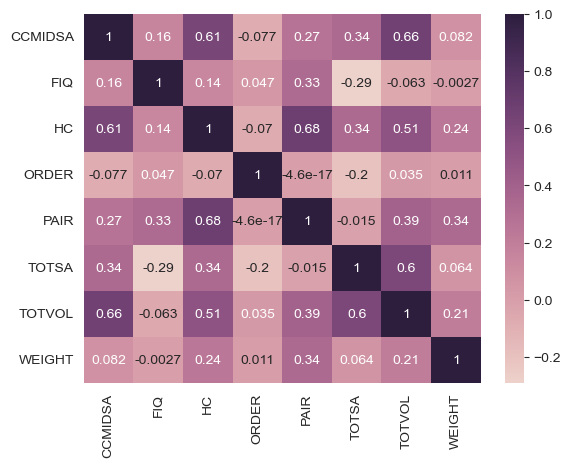

In [94]:
correlations = df.corr()
#sns.heatmap(correlations, annot=True, cmap='coolwarm')
sns.heatmap(correlations, annot = True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

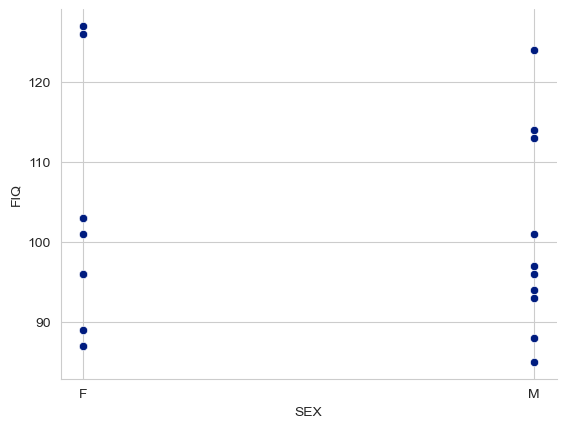

In [96]:
sns.scatterplot(x="SEX", y="FIQ", data=df)
sns.despine()

In [48]:
sample2=df[df['SEX']=='F']['FIQ']
sample1=df[df['SEX']=='M']['FIQ']
sample = np.concatenate((sample2, sample1))

# Since the rows are less than 30 we perform Shapiro test

In [78]:
stat, p = shapiro(sample)
alpha = 0.05
if p > alpha:
    print('The data is normal for  columns Sex and FIQ')
else:
    print('The data is not normal columns for Sex and FIQ')

The data is not normal columns for Sex and FIQ


# Since the data is not normal we perform Mannwhitney test

We assume 

$H_0$: There is no significant difference in FIQ between Male and female <br>
$H_1$: Reject $H_0$

There is no significant difference in FIQ between male and female, so we cannot reject H0 .


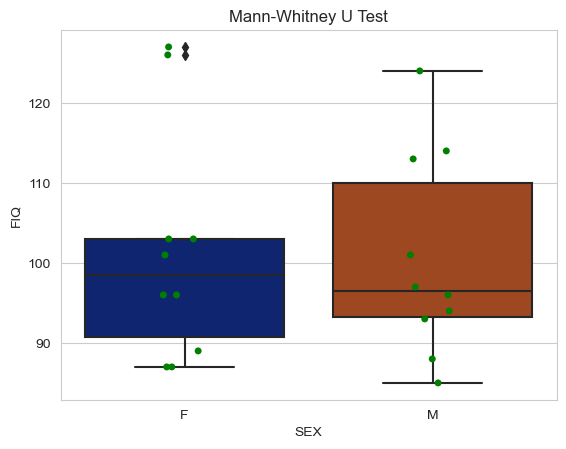

In [102]:
sample1 = df[df['SEX'] == 'M']['FIQ']
sample2 = df[df['SEX'] == 'F']['FIQ']
stat, p = mannwhitneyu(sample1, sample2)

alpha = 0.05
if p > alpha:
    print('There is no significant difference in FIQ between male and female, so we cannot reject H0 .')
else:
    print('There is a significant difference in FIQ between male and female, reject H0 .')
#print(stat)
#print(p)
sns.boxplot(x='SEX', y='FIQ', data=df)
sns.stripplot(x='SEX', y='FIQ', data=df, color='Green')
plt.title('Mann-Whitney U Test')
plt.show()

# We perform Kruskal for analysis of variance

We assume

H0: there is no significant difference in the distribution of FIQ scores between male and female. 
H1: reject H0

There is no significant difference in FIQ between male and female subjects, so we cannot reject H0.


Text(0.5, 1.0, 'Distribution of FIQ by Sex')

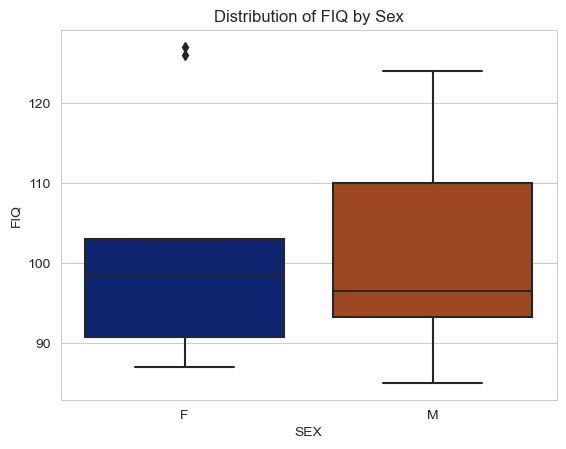

In [103]:
stat, p = kruskal(sample1, sample2)
alpha = 0.05
if p > alpha:
    print('There is no significant difference in FIQ between male and female subjects, so we cannot reject H0.')
else:
    print('There is a significant difference in FIQ between male and female subjects, reject H0.')
#print(stat)
#print(p)
sns.boxplot(x='SEX', y='FIQ', data=df)
plt.title('Distribution of FIQ by Sex')

In [104]:
print(correlations['FIQ'])

CCMIDSA    0.156252
FIQ        1.000000
HC         0.137840
ORDER      0.046597
PAIR       0.332572
TOTSA     -0.291319
TOTVOL    -0.063392
WEIGHT    -0.002703
Name: FIQ, dtype: float64


# Analysis of categorical data

F    10
M    10
Name: SEX, dtype: int64


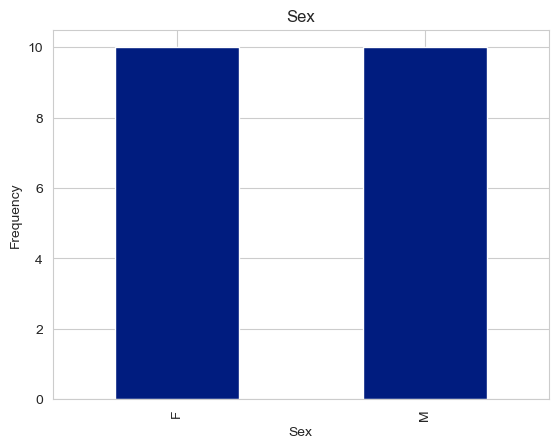

In [119]:
freq = df['SEX'].value_counts()
freq.plot(kind='bar')
print(freq)
plt.title('Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

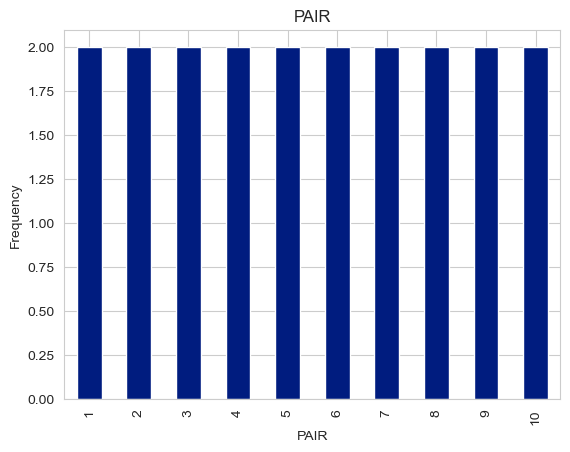

In [135]:
freq = df['PAIR'].value_counts()
freq.plot(kind='bar')
#print(freq)
plt.title('PAIR')
plt.xlabel('PAIR')
plt.ylabel('Frequency')
plt.show()

We assume 

$H_0$: There is no significant difference in SEX and PAIR <br>
$H_1$: Reject $H_0$

In [127]:
con = pd.crosstab(df['PAIR'], df['SEX'])
chi2, p, dof, expected = chi2_contingency(con)
print('Chi-square statistic:', chi2)
print('P-value:', p)

Chi-square statistic: 20.0
P-value: 0.017912404529843298


 It indicates that there is a statistically significant association between the PAIR and SEX being compared. The two variables are not independent and there is evidence to suggest that they are related or dependent on each other.

SO we can reject the null hypothesis (H0)

We assume 

$H_0$: There is no significant difference in SEX and ORDER <br>
$H_1$: Reject $H_0$

In [134]:
con = pd.crosstab(df['SEX'], df['ORDER'])
chi2, p, dof, expected = chi2_contingency(con)
print('Chi-square statistic:', chi2)
print('P-value:', p)

Chi-square statistic: 0.0
P-value: 1.0


We cannot reject H0 as we can see there is no significant association between SEX and ORDER

In [137]:
target = ['FIQ']
df.drop(columns=['SEX'])

,CCMIDSA,FIQ,HC,ORDER,PAIR,TOTSA,TOTVOL,WEIGHT
0,6.08,96,54.7,1,1,1913.88,1005,57.607
1,5.73,89,54.2,2,1,1684.89,963,58.968
2,6.22,87,53.0,1,2,1902.36,1035,64.184
3,5.80,87,52.9,2,2,1860.24,1027,58.514
4,7.99,101,57.8,1,3,2264.25,1281,63.958
5,8.42,103,56.9,2,3,2216.40,1272,61.690
6,7.44,103,56.6,1,4,1866.99,1051,133.358
7,6.84,96,55.3,2,4,1850.64,1079,107.503
8,6.48,127,53.1,1,5,1743.04,1034,62.143
9,6.43,126,54.8,2,5,1709.30,1070,83.009


# Linear Regression

In [149]:
from sklearn.model_selection import train_test_split
df1 = df.drop("SEX", axis=1)
X_train, X_test, y_train, y_test = train_test_split(df1.drop(target, axis=1), df1[target], test_size=0.2, random_state=42)

acc = []

for col in X_train.columns:
    model = LinearRegression()
    model.fit(X_train[[col]], y_train)

    train_score = model.score(X_train[[col]], y_train)
    test_score = model.score(X_test[[col]], y_test)
    
    acc.append((col, train_score, test_score))
for result in acc:
    feature = result[0]
    R2_score = result[1]
    test_score = result[2]
    #print("Feature: " + str(feature))
    print(f"R2 Score for {str(feature)}: " + str(R2_score))
    #print(f"R2 Score for {str(feature)}: " + str(test_score))


R2 Score for CCMIDSA: 0.024593368571406926
R2 Score for HC: 0.012169481866225684
R2 Score for ORDER: 0.0023173896922507042
R2 Score for PAIR: 0.09030671195178563
R2 Score for TOTSA: 0.08756032730500418
R2 Score for TOTVOL: 0.0015216628137632027
R2 Score for WEIGHT: 0.001081324231900882
